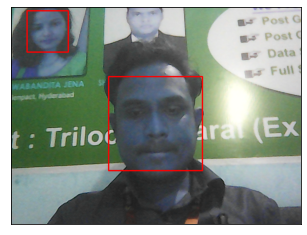

In [1]:
import cv2
#for showing the captured images as ploted
from matplotlib import pyplot as plt

# Load the cascade
face_cascade = cv2.CascadeClassifier('haarcascade_frontalface_default.xml')

# To capture video from webcam. 
cap = cv2.VideoCapture(0)
# To use a video file as input 
# cap = cv2.VideoCapture('filename.mp4')

while True:
    # Read the frame
    _, img = cap.read()

    # Convert to grayscale
    gray = cv2.cvtColor(img, cv2.COLOR_RGB2BGR)#BGR2RGB)

    # Detect the faces
    faces = face_cascade.detectMultiScale(gray, 1.1, 4)

    # Draw the rectangle around each face
    for (x, y, w, h) in faces:
        cv2.rectangle(img, (x, y), (x+w, y+h), (255, 0, 0), 2)
        

    # Display
    cv2.imshow('img', img)
    
    #modified
    plt.imshow(img)
    plt.xticks([]),plt.yticks([])
    
    #commented#plt.show()
    #new
    plt.savefig("E:/my aji documents/audiobook/trained_image/s2.png", dpi = 72)

    # Stop if escape key is pressed
    #cv2.waitKey(1) & 0xff==ord('letter to be pressed to come out from capturing mode')
    if cv2.waitKey(1) & 0xff==27:
        break
        
        
# Release the VideoCapture object
cap.release()
cv2.destroyAllWindows()

In [2]:
from datetime import datetime
import os
import numpy as np
import cv2
import face_recognition

path = 'ImagesAttendance'
images = []
classNames = []
myList = os.listdir(path)
print(myList)

for cl in myList:
    curImg = cv2.imread(f'{path}/{cl}')
    images.append(curImg)
    classNames.append(os.path.splitext(cl)[0])
print(classNames)

def findEncodings(images):
    encodeList = []
    for img in images:
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        encode = face_recognition.face_encodings(img)[0]
        encodeList.append(encode)
    return encodeList

def markAttendance(name):
    with open('Attendance.csv','r+') as f:
        myDataList = f.readlines()
        nameList = []
        for line in myDataList:
            entry = line.split(',')
            nameList.append(entry[0])
        if name not in nameList:
            now = datetime.now()
            dtString = now.strftime('%d-%m-%y at %H:%M:%S')
            f.writelines(f'\n{name},{dtString}')

encodeListKnown = findEncodings(images)
print('Encoding Successful')

cap = cv2.VideoCapture(0)

while True:
    success , img = cap.read()
    imgS = cv2.resize(img,(0,0),None,0.25,0.25)
    imgS = cv2.cvtColor(imgS, cv2.COLOR_BGR2RGB)

    facesCurFrame = face_recognition.face_locations(imgS)
    encodesCurFrame = face_recognition.face_encodings(imgS , facesCurFrame)

    for encodeFace , faceLoc in zip(encodesCurFrame , facesCurFrame):
        matches = face_recognition.compare_faces(encodeListKnown,encodeFace)
        faceDis = face_recognition.face_distance(encodeListKnown,encodeFace)
        print(faceDis)
        matchIndex = np.argmin(faceDis)

        if matches[matchIndex]:
            name = classNames[matchIndex].upper()
            print(name)
            y1, x2, y2, x1 = faceLoc
            y1, x2, y2, x1 = y1 * 4, x2 * 4, y2 * 4, x1 * 4
            cv2.rectangle(img, (x1, y1), (x2, y2), (0, 255, 0), 2)
            cv2.rectangle(img, (x1, y2 - 35), (x2, y2), (0, 255, 0), cv2.FILLED)
            cv2.putText(img, name, (x1 + 6, y2 - 6), cv2.FONT_HERSHEY_COMPLEX, 1, (255, 255, 255), 2)
            markAttendance(name)


    cv2.imshow('Webcam',img)
    cv2.waitKey(1)

ModuleNotFoundError: No module named 'face_recognition'

In [ ]:
pip install face_recognition
